In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset 

In [3]:
df_combAttack=pd.read_csv('Min_comb_data_Appr1.csv', low_memory=False)

In [4]:
# Get a concise summary of the DataFrame
print(df_combAttack.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9736056 entries, 0 to 9736055
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min

In [5]:
df_combAttack.head(5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,7,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,5,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,12858,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,10191,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,239,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN


### Data Analysis : Identifying Data Problems & Data Cleaning
1. "Unnamed" Column with int to be dropped
2. Trim the "Column names" to remove the space in the names
3. Column "Timestamp" from Object to Datetime


In [6]:
# Copy the original DataFrame to a new DataFrame
new_dataClean = df_combAttack.copy()

# 1. Drop the 'Unnamed' column
new_dataClean = new_dataClean.drop(columns=['Unnamed: 0'], errors='ignore')
if 'Unnamed: 0' not in new_dataClean.columns:
    print("\nStep 1: The 'Unnamed' column was dropped successfully.")
else:
    print("\nStep 1: The 'Unnamed' column is still present.")
    
# Step 2: Trim column names to remove spaces
# 2a : Store the original column names)
original_columns = new_dataClean.columns.copy()

# 2b : Identify and print the trimmed column names
trimmed_columns = [col for col in original_columns if col.strip() != col]
print(f"\nStep 2: Before : Trimmed columns to be Fixed:",  len(trimmed_columns))

# 2c : Trim the column names to remove spaces
new_dataClean.columns = new_dataClean.columns.str.strip()
trimmed_columns_new = [col for col in new_dataClean.columns if col.strip() != col]
print(f"\nStep 2: After : Trimmed columns to be Fixed:", len(trimmed_columns_new))


# Step 3: Convert the 'Timestamp' column from object to datetime
# Format the datetime to show only date, hour, minute, and second
new_dataClean['Timestamp'] = pd.to_datetime(new_dataClean['Timestamp'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
print(f"\nStep 3:  'Timestamp' column converted from object to datetime")



Step 1: The 'Unnamed' column was dropped successfully.

Step 2: Before : Trimmed columns to be Fixed: 71

Step 2: After : Trimmed columns to be Fixed: 0

Step 3:  'Timestamp' column converted from object to datetime


In [7]:
#Unique values Label target column

new_dataClean.loc[:,'Label'].unique()

array(['DrDoS_NTP', 'BENIGN', 'DrDoS_SSDP', 'DrDoS_NetBIOS', 'DrDoS_DNS',
       'DrDoS_MSSQL', 'DrDoS_UDP', 'DrDoS_LDAP', 'DrDoS_SNMP'],
      dtype=object)

### Data Analysis : Identifying Data Problems & Data Cleaning
4. Check for duplicate rows and removes duplicates, keeping the first occurrence of each.

In [8]:
# Step 4: Check if Duplicate rows are there
duplicates = new_dataClean.duplicated().sum()
print(f"\nStep 4: Number of duplicate rows: {duplicates}")

# Display duplicated rows
if duplicates > 0:
    duplicated_rows = new_dataClean[new_dataClean.duplicated(keep=False)]
    # Specify the columns you want to display
    selected_columns = ['Source IP','Source Port', 'Destination IP','Protocol']  # Adjust this list as needed
    print("\nDuplicated rows:")
    print(duplicated_rows[selected_columns])
    # Drop duplicates, keeping the first occurrence
    new_dataClean = new_dataClean.drop_duplicates(keep='first')
    print(f"\nDuplicates removed. Remaining rows: {len(new_dataClean)}")
else:
    print("No duplicate rows found.")


Step 4: Number of duplicate rows: 17

Duplicated rows:
              Source IP  Source Port  Destination IP  Protocol
15157      192.168.50.1           22      172.16.0.5         6
15158      192.168.50.1           22      172.16.0.5         6
178861     192.168.50.8        59034      8.43.72.98         6
178862     192.168.50.8        59034      8.43.72.98         6
178863     192.168.50.8        59018  104.36.115.113         6
178864     192.168.50.8        59018  104.36.115.113         6
522289     192.168.50.1        42398   54.192.49.120         6
522290     192.168.50.1        42398   54.192.49.120         6
522291     192.168.50.1        42396   54.192.49.120         6
522292     192.168.50.1        42396   54.192.49.120         6
890361       172.16.0.5          847    192.168.50.1        17
890404       172.16.0.5          847    192.168.50.1        17
931896     192.168.50.8        59052  104.36.115.113         6
931897     192.168.50.8        59052  104.36.115.113         6

### Data Analysis : Identifying Data Problems & Data Cleaning
5. Identify any columns with missing values(NaN (Not a Number) in pandas.) and their counts


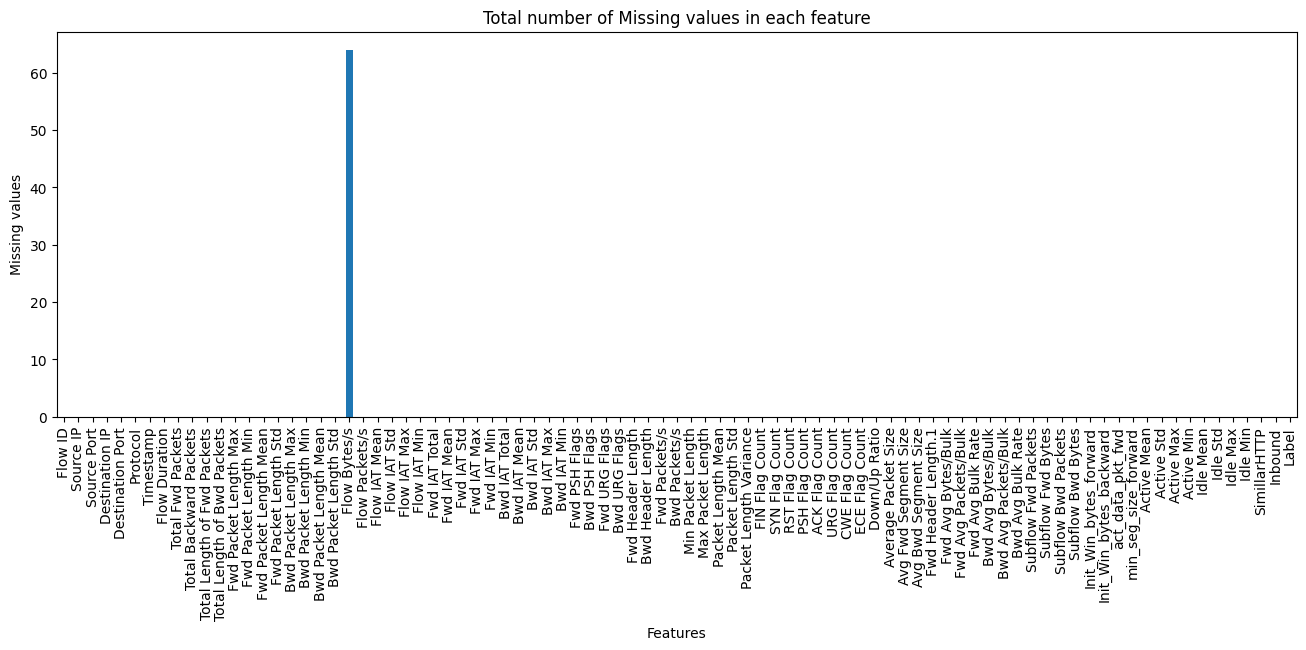

In [9]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum() 
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(new_dataClean)

In [10]:
def check_missing_values(df):
    # Check for missing values in each column
    missing_values = df.isnull().sum()
    
    # Filter to show only columns with missing values
    columns_with_missing = missing_values[missing_values > 0]
    
    # Print the columns with missing values and their counts
    print("\nColumns with missing values:")
    print(columns_with_missing)

    return columns_with_missing

# Step 1: Initial check for missing values
check_missing_values(new_dataClean)

# Step 2: Show rows with any missing values with only few columns
# Display the rows with missing values
rows_with_missing_values = new_dataClean[new_dataClean.isnull().any(axis=1)]
selected_columns = ['Source IP', 'Destination IP', 'Protocol', 'Flow Bytes/s', 'Label']  # Adjust this list as needed
print("\nRows with missing values:")
print(rows_with_missing_values[selected_columns])

# Step 3: Replace all NaN values in the entire DataFrame with 0
## Check for missing values again
new_dataClean.fillna(0, inplace=True)
check_missing_values(new_dataClean)



Columns with missing values:
Flow Bytes/s    64
dtype: int64

Rows with missing values:
              Source IP  Destination IP  Protocol  Flow Bytes/s   Label
328        192.168.50.7     72.21.91.29         6           NaN  BENIGN
1928        13.107.4.50    192.168.50.7         6           NaN  BENIGN
3086       192.168.50.6   172.217.3.102         6           NaN  BENIGN
7284      172.217.3.106    192.168.50.8         6           NaN  BENIGN
15138      23.220.46.76    192.168.50.6         6           NaN  BENIGN
...                 ...             ...       ...           ...     ...
8405163    172.217.10.1    192.168.50.8         6           NaN  BENIGN
8405168    192.168.50.8  172.217.10.226         6           NaN  BENIGN
8405170   172.217.11.36    192.168.50.8         6           NaN  BENIGN
9300977  172.217.12.130    192.168.50.6         6           NaN  BENIGN
9304715  74.208.236.171    192.168.50.6         6           NaN  BENIGN

[64 rows x 5 columns]

Columns with missing va

Series([], dtype: int64)

### Data Analysis : Identifying Data Problems & Data Cleaning
6. Remove rows with Infiny data which were found in colunn ['Flow Bytes/s', 'Flow Packets/s']

In [11]:
import numpy as np

# Select numerical columns
dt = new_dataClean.select_dtypes(include=['number'])

# Check for infinity values
infinity_mask = ~np.isfinite(dt)

# Get the columns that contain infinity values
infinity_columns = dt.columns[infinity_mask.any(axis=0)]

# Count rows with any infinity values
infinity_rows_count = len(dt[~np.isfinite(dt).all(axis=1)])

# Print results
print(f"Number of rows with infinity values: {infinity_rows_count}")
print("Columns containing infinity values:", infinity_columns.tolist())
print(f"Original DataFrame shape: {new_dataClean.shape}")
new_dataClean = new_dataClean[~infinity_mask.any(axis=1)]

print(f"Cleaned DataFrame shape: {new_dataClean.shape}")

Number of rows with infinity values: 181351
Columns containing infinity values: ['Flow Bytes/s', 'Flow Packets/s']
Original DataFrame shape: (9736039, 87)
Cleaned DataFrame shape: (9554688, 87)


### Data Analysis : Reviewing Object Columns and trying possible conveting to Numeric
<small>
Object columns, which typically contain categorical data represented as strings, are generally not preferred for machine learning algorithms
</small>


1. Identify the Objects and based on below details remove the columns
    1. The high cardinality columns (High cardinality features may lead to overfitting or increased computational costs.)  
    2. Incompatibility with Algorithms and does not makes sense to Analysis
2. Column planning to be removed : 'Flow ID', 'Source IP', 'Destination IP','SimillarHTTP', 

In [12]:
# Identify object columns
object_columns = new_dataClean.select_dtypes(include=['object'])
print(f"Unique Columns: {object_columns.columns}")

# Check cardinality
high_cardinality_columns = {}
threshold = 50  # Define your threshold for high cardinality

for column in object_columns.columns:
    unique_count = object_columns[column].nunique()
    if unique_count > threshold:
        high_cardinality_columns[column] = unique_count

# Display high cardinality columns
print("High Cardinality Columns that can be removed:")
for col, count in high_cardinality_columns.items():
    print(f"{col}: {count} unique values")

Unique Columns: Index(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'SimillarHTTP',
       'Label'],
      dtype='object')
High Cardinality Columns that can be removed:
Flow ID: 8743059 unique values
Source IP: 411 unique values
Destination IP: 442 unique values
Timestamp: 7627 unique values
SimillarHTTP: 361 unique values


In [13]:
print(f"\n DataFrame shape before dropping columns: {new_dataClean.shape}")
# Drop columns
new_dataClean = new_dataClean.drop(columns=['Flow ID', 'Source IP', 'Destination IP', 'SimillarHTTP','Timestamp'])
# check the shape of the new DataFrame to confirm removal of Columns
print(f"\nNew DataFrame shape after dropping columns based on high Cardinality and non uasge in business case : {new_dataClean.shape}")


 DataFrame shape before dropping columns: (9554688, 87)

New DataFrame shape after dropping columns based on high Cardinality and non uasge in business case : (9554688, 82)


### Label Encoding on the Targer columns for 
'DrDoS_NTP', 'BENIGN', 'DrDoS_SSDP', 'DrDoS_NetBIOS', 'DrDoS_DNS',
       'DrDoS_MSSQL', 'DrDoS_UDP', 'DrDoS_LDAP', 'DrDoS_SNMP'

In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'new_dataClean' is your DataFrame and 'Label' is your target variable
label_encoder = LabelEncoder()
new_dataClean['Label'] = label_encoder.fit_transform(new_dataClean['Label'])

# Now 'Label' is transformed into numeric format
print(new_dataClean['Label'].unique())  # Check the unique encoded values

[4 0 7 5 1 3 8 2 6]


### Test1: Feature Elimination - Standard Deviation to Zero
1. Checking columns values having SD as 0 Ensure we are running on numeric column

In [15]:
# Assuming new_dataClean is your DataFrame
# Select only numeric columns
numeric_columns = new_dataClean.select_dtypes(include=['number'])

# Calculate the standard deviation for each numeric column
std_devs = numeric_columns.std()

# Set a threshold for what you consider "close to 0"
threshold = 0.01

# Find columns with standard deviation of 0 or close to it
low_variance_columns = std_devs[std_devs <= threshold].index.tolist()

# Print the columns with low variance
print("Columns with Standard Deviation close to 0:")
for col in low_variance_columns:
    print(col)

Columns with Standard Deviation close to 0:
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
FIN Flag Count
SYN Flag Count
PSH Flag Count
ECE Flag Count
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


### Test2: Feature Elimination - Knowledge
1. Checking columns values having mostly 0 as data. 
So cleaning all columns with 100% data as 0 (From security perspective these column does not hold any information if everything is 0)

In [16]:
# Step 1: Get the total number of rows
total_rows1 = len(new_dataClean)

# Step 2: Count non-zero values for each column
non_zero_counts1 = (new_dataClean != 0).sum()

# Step 3: Calculate the percentage of non-zero values
non_zero_percentage1 = (non_zero_counts1 / total_rows1) * 100

# Step 4: Create a DataFrame for formatting
result_df1 = pd.DataFrame({
    'Non-Zero Count': non_zero_counts1,
    'Percentage': non_zero_percentage1
})

# Step 5: Filter for columns with more than 20% non-zero values
filtered_result1 = result_df1[result_df1['Percentage'] <= 0.01]

# Step 6: Display the result
print(filtered_result1)

                      Non-Zero Count  Percentage
Bwd PSH Flags                      0    0.000000
Fwd URG Flags                      0    0.000000
Bwd URG Flags                      0    0.000000
FIN Flag Count                     0    0.000000
SYN Flag Count                   271    0.002836
PSH Flag Count                     0    0.000000
ECE Flag Count                     0    0.000000
Fwd Avg Bytes/Bulk                 0    0.000000
Fwd Avg Packets/Bulk               0    0.000000
Fwd Avg Bulk Rate                  0    0.000000
Bwd Avg Bytes/Bulk                 0    0.000000
Bwd Avg Packets/Bulk               0    0.000000
Bwd Avg Bulk Rate                  0    0.000000


### Finally dropping Column Features (Using Test1 and Test2 deductions )
1. As both Standard Deviation deduction and Knowledge deduction suggest similar columns
2. Hence DROPPING the above columns

In [17]:
# Drop low-variance columns from the original DataFrame and store in a new DataFrame
new_dataClean_reduced = new_dataClean.drop(columns=low_variance_columns)

# Optionally, check the shape of the new DataFrame to confirm reduction
print(f"\nNew DataFrame shape after dropping columsn with SD=0 and Knowledge deduction : {new_dataClean_reduced.shape}")


New DataFrame shape after dropping columsn with SD=0 and Knowledge deduction : (9554688, 69)


### Feature Elimination - Correlation eliminating Reduandancy
When two or more features are highly correlated (e.g., correlation coefficient > 0.9), it means they provide similar information. Keeping both can lead to redundancy, which can negatively affect model performance.

In [18]:
# Assuming new_dataClean is your DataFrame
# Select only numeric columns
numeric_columns = new_dataClean_reduced.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))

high_correlation = correlation_matrix[correlation_matrix.abs() == 1]

for column in high_correlation.columns:
    # Get the indices of highly correlated features
    correlated_features = high_correlation[column].index[high_correlation[column].abs() == 1]
    
    # Skip self-correlation
    if column in correlated_features:
        correlated_features = correlated_features[correlated_features != column]
    
    if len(correlated_features) > 0:
        for feature in correlated_features:
            print(f"{column} is highly correlated with {feature} (Correlation: {high_correlation[column][feature]})")

Total Fwd Packets is highly correlated with Subflow Fwd Packets (Correlation: 1.0)
Total Backward Packets is highly correlated with Subflow Bwd Packets (Correlation: 1.0)
Total Length of Fwd Packets is highly correlated with Subflow Fwd Bytes (Correlation: 1.0)
Total Length of Bwd Packets is highly correlated with Subflow Bwd Bytes (Correlation: 1.0)
Fwd Packet Length Mean is highly correlated with Avg Fwd Segment Size (Correlation: 1.0)
Bwd Packet Length Mean is highly correlated with Avg Bwd Segment Size (Correlation: 1.0)
Fwd PSH Flags is highly correlated with RST Flag Count (Correlation: 1.0)
Fwd Header Length is highly correlated with Fwd Header Length.1 (Correlation: 1.0)
RST Flag Count is highly correlated with Fwd PSH Flags (Correlation: 1.0)
Avg Fwd Segment Size is highly correlated with Fwd Packet Length Mean (Correlation: 1.0)
Avg Bwd Segment Size is highly correlated with Bwd Packet Length Mean (Correlation: 1.0)
Fwd Header Length.1 is highly correlated with Fwd Header Len

<Figure size 1200x1000 with 0 Axes>

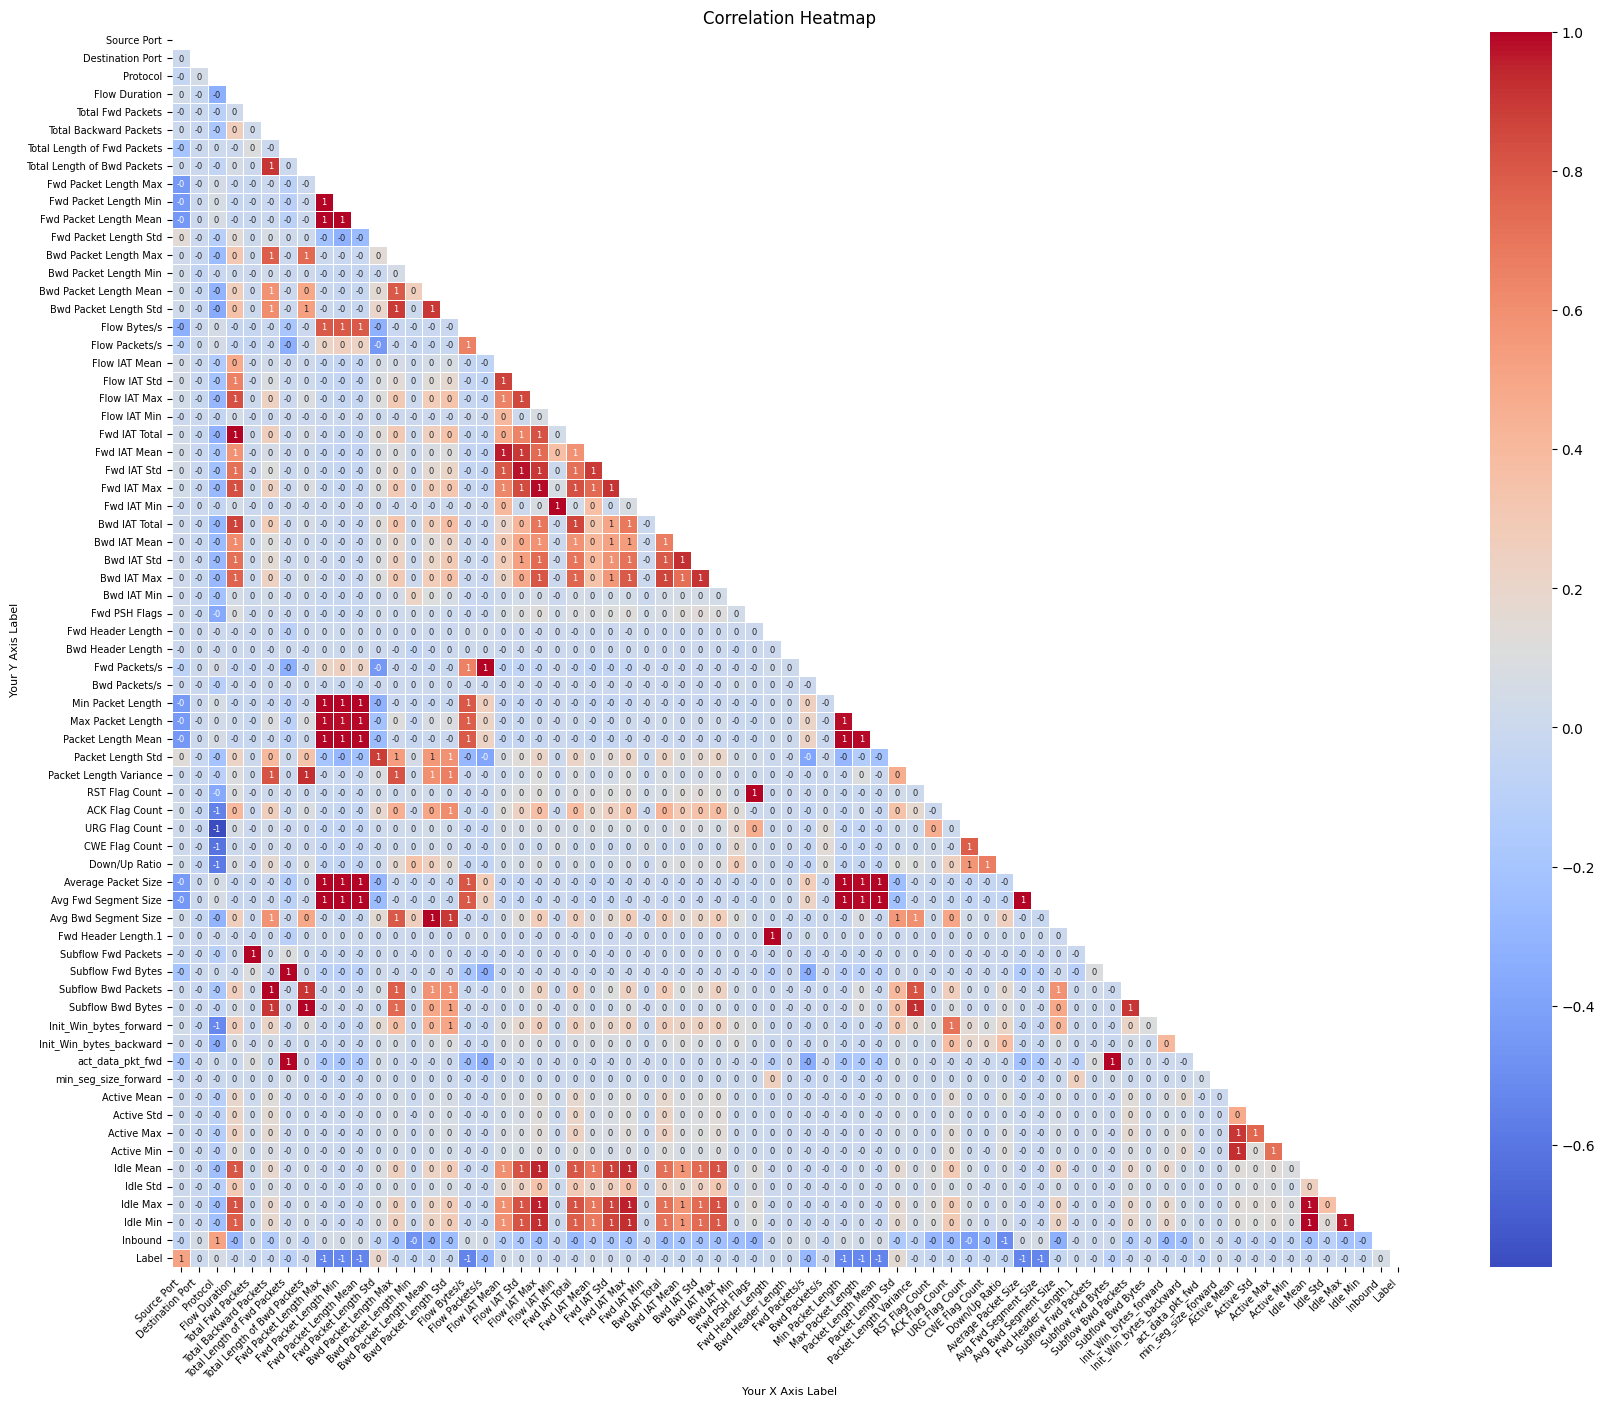

In [19]:
plt.figure(figsize=(18, 14)) 
mask = np.triu(np.ones_like(correlation_matrix))

ax =sns.heatmap(correlation_matrix,mask=mask, annot=True,  fmt=".0f", cmap='coolwarm', square=True, linewidths=0.5, annot_kws={"size": 6})
# Set x and y axis labels
ax.set_xlabel('Your X Axis Label', fontsize=8)
ax.set_ylabel('Your Y Axis Label', fontsize=8)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=7)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0,horizontalalignment='right', fontsize=7)
# Adjust layout
plt.tight_layout()

plt.title('Correlation Heatmap')
plt.show()



### Feature Elimination - Based on high Correlation + Heatmap + self Exploration (high correlated column are exact same)

<small>
Noticed Fwd Header Length and Fwd Header Length.1 having same column name hence interested to see if the values are also same.<br/>
  pairs_to_compare = [<br/>
    ('Total Fwd Packets', 'Subflow Fwd Packets'),<br/>
    ('Total Backward Packets', 'Subflow Bwd Packets'),<br/>
    ('Total Length of Fwd Packets', 'Subflow Fwd Bytes'),<br/>
    ('Total Length of Bwd Packets', 'Subflow Bwd Bytes'),<br/>
    ('Fwd Packet Length Mean', 'Avg Fwd Segment Size'),<br/>
    ('Bwd Packet Length Mean', 'Avg Bwd Segment Size'),<br/>
    ('Fwd PSH Flags', 'RST Flag Count'),<br/>
    ('Fwd Header Length', 'Fwd Header Length.1') ]
</small>

In [20]:
import pandas as pd

new_data_removeSimilarCols = new_dataClean_reduced.copy()

# Assuming `new_dataClean_reduced` is your DataFrame containing the relevant numeric columns
numeric_columns = new_dataClean_reduced[['Total Fwd Packets', 
                                           'Subflow Fwd Packets', 
                                           'Total Backward Packets', 
                                           'Subflow Bwd Packets', 
                                           'Total Length of Fwd Packets', 
                                           'Subflow Fwd Bytes', 
                                           'Total Length of Bwd Packets', 
                                           'Subflow Bwd Bytes',
                                           'Fwd Packet Length Mean',
                                           'Avg Fwd Segment Size',
                                           'Bwd Packet Length Mean',
                                           'Avg Bwd Segment Size',
                                           'Fwd PSH Flags',
                                           'RST Flag Count',
                                           'Fwd Header Length',
                                           'Fwd Header Length.1']]

# Step 1: Define the pairs of columns to compare
pairs_to_compare = [
    ('Total Fwd Packets', 'Subflow Fwd Packets'),
    ('Total Backward Packets', 'Subflow Bwd Packets'),
    ('Total Length of Fwd Packets', 'Subflow Fwd Bytes'),
    ('Total Length of Bwd Packets', 'Subflow Bwd Bytes'),
    ('Fwd Packet Length Mean', 'Avg Fwd Segment Size'),
    ('Bwd Packet Length Mean', 'Avg Bwd Segment Size'),
    ('Fwd PSH Flags', 'RST Flag Count'),
    ('Fwd Header Length', 'Fwd Header Length.1')
]

# Step 2: Create a function to calculate percentage similarity
def calculate_percentage_similarity(col1, col2):
    matching_values = (col1 == col2).sum()
    total_values = len(col1)
    percentage_similarity = (matching_values / total_values) * 100
    return percentage_similarity

# Step 3: Compare specified pairs and store results
similarity_results = {}

for col1, col2 in pairs_to_compare:
    percentage = calculate_percentage_similarity(numeric_columns[col1], numeric_columns[col2])
    similarity_results[(col1, col2)] = percentage
    # Drop the second column from the original DataFrame if similarity is 100%
    if percentage >= 99:
        new_data_removeSimilarCols.drop(columns=[col2], inplace=True)

# Step 4: Display results
for (col1, col2), percentage in similarity_results.items():
    print(f"Percentage similarity between {col1} and {col2}: {percentage:.2f}%")

# check the shape of the new DataFrame to confirm removal of Columns
print(f"\nNew DataFrame shape after dropping columns based on high Correlation and similar data : {new_data_removeSimilarCols.shape}")

Percentage similarity between Total Fwd Packets and Subflow Fwd Packets: 100.00%
Percentage similarity between Total Backward Packets and Subflow Bwd Packets: 100.00%
Percentage similarity between Total Length of Fwd Packets and Subflow Fwd Bytes: 100.00%
Percentage similarity between Total Length of Bwd Packets and Subflow Bwd Bytes: 100.00%
Percentage similarity between Fwd Packet Length Mean and Avg Fwd Segment Size: 99.44%
Percentage similarity between Bwd Packet Length Mean and Avg Bwd Segment Size: 99.98%
Percentage similarity between Fwd PSH Flags and RST Flag Count: 100.00%
Percentage similarity between Fwd Header Length and Fwd Header Length.1: 100.00%

New DataFrame shape after dropping columns based on high Correlation and similar data : (9554688, 61)


In [21]:
new_data_removeSimilarCols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9554688 entries, 0 to 9736055
Data columns (total 61 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Source Port                  int64  
 1   Destination Port             int64  
 2   Protocol                     int64  
 3   Flow Duration                int64  
 4   Total Fwd Packets            int64  
 5   Total Backward Packets       int64  
 6   Total Length of Fwd Packets  float64
 7   Total Length of Bwd Packets  float64
 8   Fwd Packet Length Max        float64
 9   Fwd Packet Length Min        float64
 10  Fwd Packet Length Mean       float64
 11  Fwd Packet Length Std        float64
 12  Bwd Packet Length Max        float64
 13  Bwd Packet Length Min        float64
 14  Bwd Packet Length Mean       float64
 15  Bwd Packet Length Std        float64
 16  Flow Bytes/s                 float64
 17  Flow Packets/s               float64
 18  Flow IAT Mean                float64
 19  Flow 

In [22]:
new_data_removeSimilarCols.to_csv('new_data_removeSimilarCols.csv', index=False)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('new_data_removeSimilarCols.csv')
sample_percentage = 0.1  # Change this to your desired percentage

# Create an empty list to hold the samples
samples = []

# Perform stratified sampling
for label in data['Label'].unique():
    class_data = data[data['Label'] == label]
    sample_size = int(len(class_data) * sample_percentage)
    
    # Ensure sample size is greater than 0
    if sample_size > 0:
        sampled_class_data = class_data.sample(n=sample_size, random_state=42)
        samples.append(sampled_class_data)

# Combine all sampled data into a single DataFrame
sampled_data = pd.concat(samples)

# Check the size of the sampled data
print(f'Sampled dataset size: {sampled_data.shape}')

# Separate features and labels for the sampled data
X_sampled = sampled_data.drop(columns=['Label'])
y_sampled = sampled_data['Label']


# Split the sampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled)



Sampled dataset size: (955465, 61)


In [2]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (764372, 60)
The test dataset size =  (191093, 60)


In [3]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [4]:

# Make predictions and evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7180273479405316
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       427
           1       0.63      0.63      0.63     23256
           2       0.57      0.55      0.56     23872
           3       0.94      0.96      0.95     23471
           4       1.00      1.00      1.00     23914
           5       0.86      0.89      0.87     23988
           6       0.67      0.66      0.66     24207
           7       0.52      0.51      0.52     23940
           8       0.54      0.54      0.54     24018

    accuracy                           0.72    191093
   macro avg       0.75      0.75      0.75    191093
weighted avg       0.72      0.72      0.72    191093



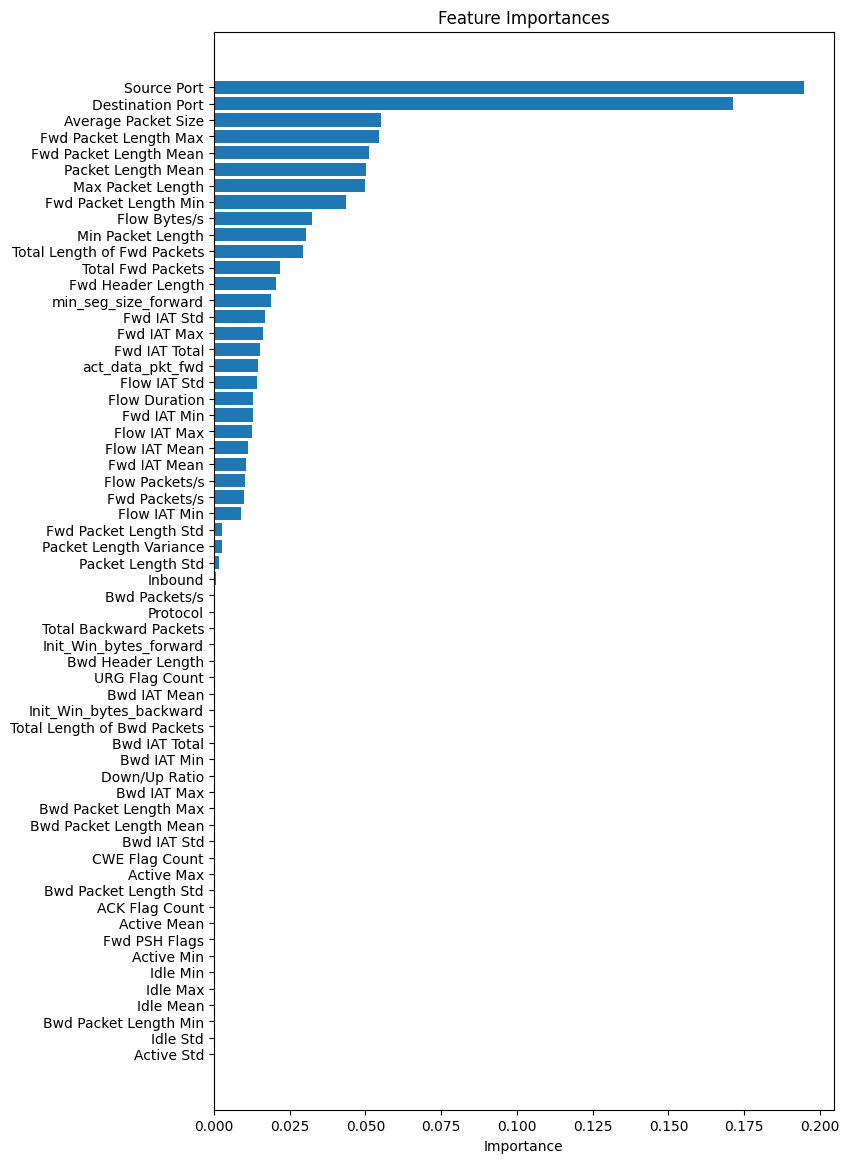

In [5]:
import matplotlib.pyplot as plt

# Getting feature importances from the trained model
importances = model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)

# Replace with actual column names from X_train
feature_names = X_train.columns[indices]  # Use actual column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)  # Use actual names for y-ticks
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()


In [18]:
# Count unique source ports
unique_source_ports = new_data_removeSimilarCols['Source Port'].nunique()
print(f"Number of unique source ports: {unique_source_ports}")

# Count unique destination ports
unique_destination_ports = new_data_removeSimilarCols['Destination Port'].nunique()
print(f"Number of unique destination ports: {unique_destination_ports}")

# Frequency distribution of source ports
source_port_counts = new_data_removeSimilarCols['Source Port'].value_counts()

# Frequency distribution of destination ports
destination_port_counts = new_data_removeSimilarCols['Destination Port'].value_counts()

# Display the top 10 most common source ports
print("Top 10 Source Ports:")
print(source_port_counts.head(20))

# Display the top 10 most common destination ports
print("Top 10 Destination Ports:")
print(destination_port_counts.head(20))

Number of unique source ports: 60945
Number of unique destination ports: 65534
Top 10 Source Ports:
Source Port
634      206082
900      181091
648      120264
672      103609
61850     84257
564       81909
512       12325
530       11760
680       10997
1022      10639
688       10596
513       10591
678       10574
521       10566
683       10564
623       10553
516       10550
549       10546
591       10544
524       10543
Name: count, dtype: int64
Top 10 Destination Ports:
Destination Port
53       8010
443      5907
80       5620
22       1618
137      1054
0         872
16460     380
44455     356
36466     342
55369     338
59832     333
50652     333
8171      333
50811     332
51774     332
34605     331
49153     330
44832     329
12520     329
5792      329
Name: count, dtype: int64


/var/folders/zr/6ndp6hwn0d33hl5s94wy8rv40000gn/T/ipykernel_82893/1527911907.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=port_counts.index.astype(str), y=port_counts.values, palette='viridis')


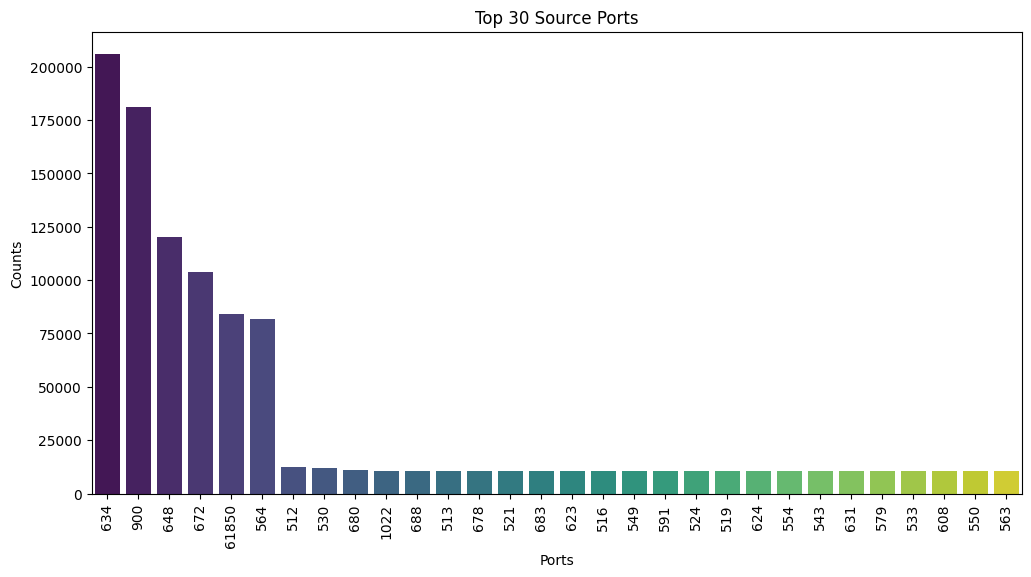

/var/folders/zr/6ndp6hwn0d33hl5s94wy8rv40000gn/T/ipykernel_82893/1527911907.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=port_counts.index.astype(str), y=port_counts.values, palette='viridis')


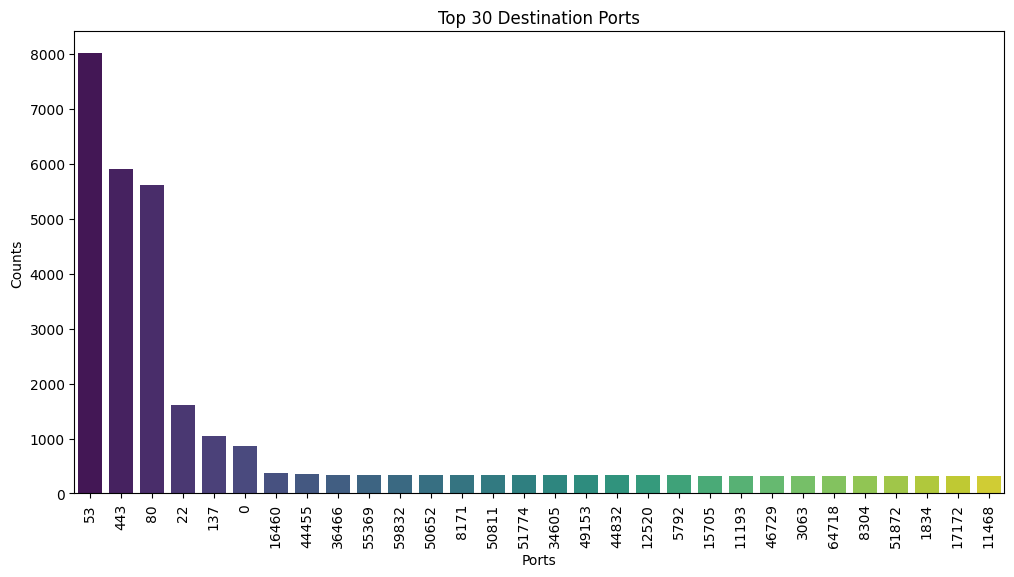

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot top N ports, sorted by counts
def plot_top_ports(port_counts, title):
    # Sort the port counts in descending order
    port_counts = port_counts.sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=port_counts.index.astype(str), y=port_counts.values, palette='viridis')
    plt.title(title)
    plt.xlabel('Ports')
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.show()

# Count occurrences of source and destination ports, taking top 30
source_port_counts = new_data_removeSimilarCols['Source Port'].value_counts().head(30)
destination_port_counts = new_data_removeSimilarCols['Destination Port'].value_counts().head(30)

# Plot top 30 source ports
plot_top_ports(source_port_counts, 'Top 30 Source Ports')

# Plot top 30 destination ports
plot_top_ports(destination_port_counts, 'Top 30 Destination Ports')




In [20]:
# Count unique source ports
unique_source_ports = new_data_removeSimilarCols['Source IP'].nunique()
print(f"Number of unique source ports: {unique_source_ports}")

# Count unique destination ports
unique_destination_ports = new_data_removeSimilarCols['Destination IP'].nunique()
print(f"Number of unique destination ports: {unique_destination_ports}")

# Frequency distribution of source ports
source_port_counts = new_data_removeSimilarCols['Source IP'].value_counts()

# Frequency distribution of destination ports
destination_port_counts = new_data_removeSimilarCols['Destination IP'].value_counts()

# Display the top 10 most common source ports
print("Top 10 Source IP:")
print(source_port_counts.head(20))

# Display the top 10 most common destination ports
print("Top 10 Destination IP:")
print(destination_port_counts.head(20))

Number of unique source ports: 411
Number of unique destination ports: 442
Top 10 Source IP:
Source IP
172.16.0.5        9526431
192.168.50.1         7054
192.168.50.7         6259
192.168.50.6         5400
192.168.50.8         5284
74.208.236.171        486
192.168.50.253        221
192.168.50.254        214
8.6.0.1               120
72.21.91.29           115
172.217.12.194         72
23.194.142.15          61
172.217.10.226         59
172.217.10.2           58
172.217.3.98           57
172.217.6.194          55
0.0.0.0                55
216.58.219.194         54
172.217.11.34          51
172.217.7.2            49
Name: count, dtype: int64
Top 10 Destination IP:
Destination IP
192.168.50.1      9526480
172.16.0.5           6884
4.2.2.4              6182
8.8.8.8              1745
74.208.236.171       1545
192.168.50.7         1300
192.168.50.8         1193
192.168.50.6         1119
224.0.0.5             431
72.21.91.29           388
23.194.142.213        167
172.217.3.98          155
1

### Feature Elimination Principal Component Analysis (PCA) Part 1

<small>
As we came to know earlier that

1. **Total Fwd Packets** is highly correlated with **Subflow Fwd Packets** (Correlation: 1.0)  
2. **Total Backward Packets**  is highly correlated with **Subflow Bwd Packets** (Correlation: 1.0)  
3. **Total Length of Fwd Packets** is highly correlated with **Subflow Fwd Bytes** (Correlation: 1.0)  
4. **Total Length of Bwd Packets** is highly correlated with **Subflow Bwd Bytes** (Correlation: 1.0)  
5. **Fwd Packet Length Mean** is highly correlated with **Avg Fwd Segment Size** (Correlation: 1.0)
6. **Bwd Packet Length Mean** is highly correlated with **Avg Bwd Segment Size** (Correlation: 1.0)
7. **Fwd PSH Flags** is highly correlated with **RST Flag Count** (Correlation: 1.0)
8. **Fwd Header Length** is highly correlated with **Fwd Header Length.1** (Correlation: 1.0)
</small>

First we will fit PCA without specifying the no of dimensionality reduction needed. <br/>
Will determine the optimal number of components based on the cumulative variance threshold which we have set to  
* 0.90  # threshold for cumulative explained variance with Plot
* Pictorial representation of Individual variance

Second Apply the PCA with the component number advised.

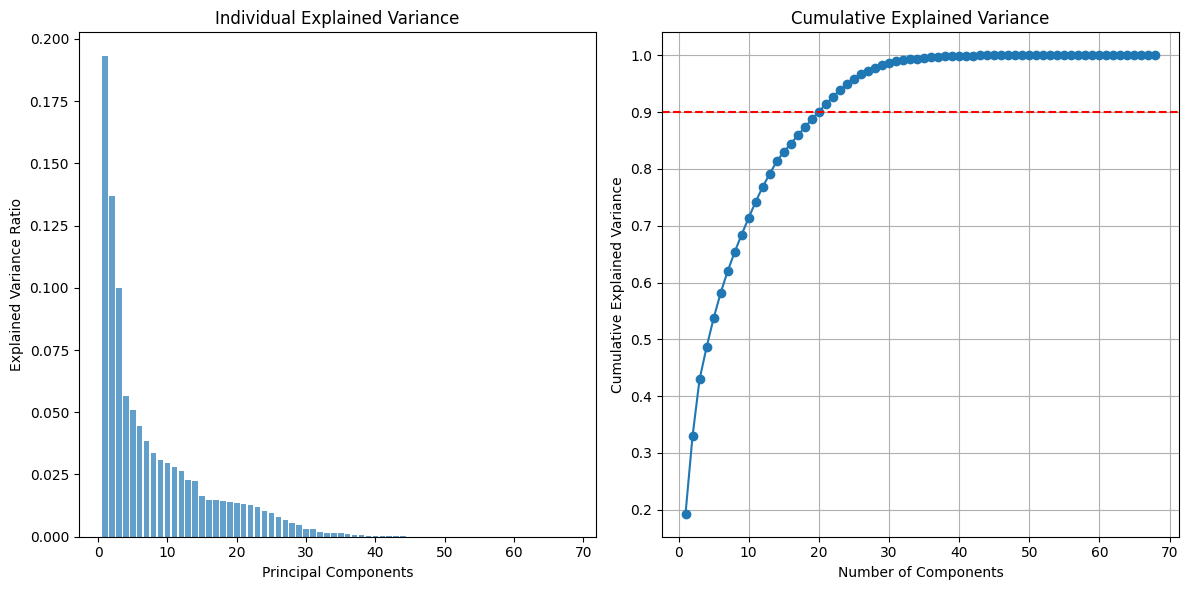

Optimal number of components: 20
      Source Port  Destination Port  Protocol  Flow Duration  \
PC1      0.027577         -0.010278 -0.124362       0.238259   
PC2     -0.145775         -0.001220  0.007827       0.038802   
PC3     -0.005039         -0.006203 -0.056862      -0.083017   
PC4      0.021410         -0.026658 -0.385737      -0.025428   
PC5     -0.184854         -0.005498 -0.062920       0.000640   
PC6      0.004487          0.001521  0.047093       0.055001   
PC7     -0.005921          0.008820  0.007793      -0.060147   
PC8      0.044051         -0.005299  0.023402      -0.019213   
PC9     -0.025919          0.007740  0.000678       0.003128   
PC10    -0.028955         -0.011334 -0.053212       0.009492   
PC11     0.073627         -0.000037 -0.037394       0.005215   
PC12    -0.039297         -0.016070  0.008253       0.030499   
PC13     0.018605         -0.063269  0.093901      -0.094894   
PC14     0.025986         -0.045234  0.172230       0.058975   
PC15   

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Select the relevant features
num_col_After_del_SimilarCols = new_dataClean_reduced.select_dtypes(include=['number'])

# Step 3: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_col_After_del_SimilarCols)

# Step 4: Fit PCA without limiting components
pca_full = PCA()  # No n_components specified
pca_full.fit(scaled_features)

# Step 5: Analyze explained variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Step 6: Plot individual and cumulative explained variance
plt.figure(figsize=(12, 6))

# Individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Individual Explained Variance')

# Cumulative explained variancewith Threshold  at 90%
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--') 
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.tight_layout()
plt.show()

# Step 7: Determine the optimal number of components based on the cumulative variance threshold
threshold = 0.90  # Example threshold for cumulative explained variance
n_components = np.argmax(cumulative_variance >= threshold) + 1  

print("Optimal number of components:", n_components)

# Step 8: Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_features)


# Step 9: Analyze component loadings
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=num_col_After_del_SimilarCols.columns, index=[f'PC{i+1}' for i in range(len(loadings))])
print(loading_df)

# Step 5: Analyze explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)



In [15]:
# Define a threshold for significant loadings
threshold = 0.5  # Adjust based on your criteria

# Initialize a set to collect important features
important_features = set()

# Analyze loadings for the first few principal components
for pc in loading_df.index[:n_components]:  # Look at the number of optimal components
    significant_loadings = loading_df.loc[pc][(loading_df.loc[pc].abs() > threshold)]
    important_features.update(significant_loadings.index)

# Print the important features based on PCA loadings
print("Important features based on PCA loadings:", important_features)

Important features based on PCA loadings: {'Total Fwd Packets', 'Bwd Header Length', 'Fwd Header Length', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Idle Std', 'Bwd Packet Length Min', 'Destination Port', 'Active Max', 'Active Mean', 'Bwd Packets/s'}


In [135]:
features.head(100)

,Total Fwd Packets,Subflow Fwd Packets,Total Backward Packets,Subflow Bwd Packets,Total Length of Fwd Packets,Subflow Fwd Bytes,Total Length of Bwd Packets,Subflow Bwd Bytes,Fwd Packet Length Mean,Avg Fwd Segment Size,Bwd Packet Length Mean,Fwd PSH Flags,Avg Bwd Segment Size,RST Flag Count,Fwd Header Length
0,12,12,9,9,1928.0,1928,4290.0,4290,160.666667,160.666667,476.666667,0,476.666667,0,400
1,5,5,2,2,0.0,0,0.0,0,0.000000,0.000000,0.000000,0,0.000000,0,176
2,2,2,0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000,0,0.000000,0,40
3,2,2,0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000,0,0.000000,0,40
4,52,52,0,0,0.0,0,0.0,0,0.000000,0.000000,0.000000,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,3,3,0.0,0,0.0,0,0.000000,0.000000,0.000000,0,0.000000,0,20
96,19,19,20,20,2424.0,2424,26090.0,26090,127.578947,127.578947,1304.500000,0,1304.500000,0,404
97,14,14,16,16,1462.0,1462,12670.0,12670,104.428571,104.428571,791.875000,0,791.875000,0,304
98,1,1,2,2,0.0,0,0.0,0,0.000000,0.000000,0.000000,0,0.000000,0,20


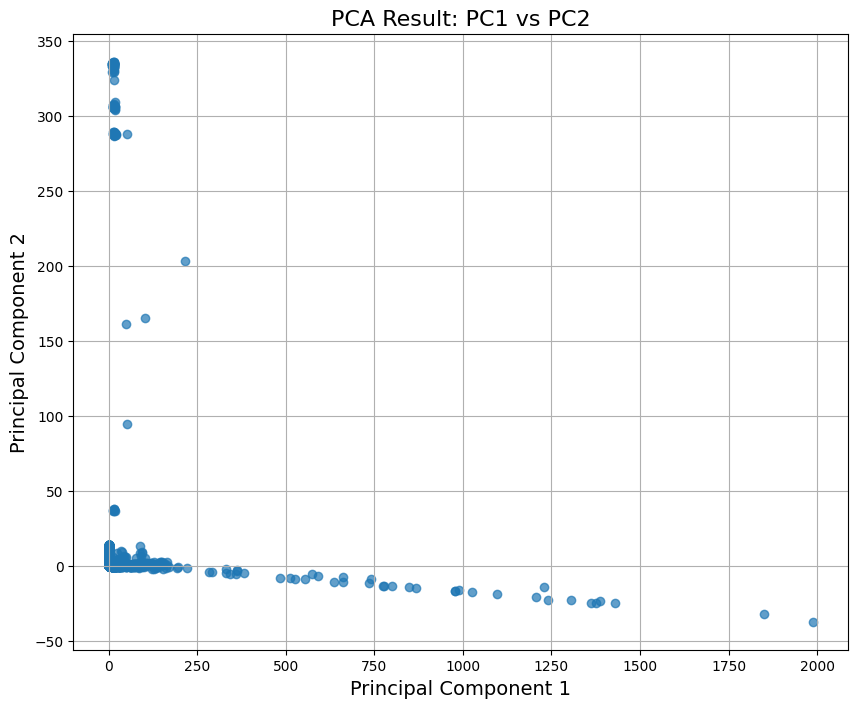

In [84]:
import matplotlib.pyplot as plt

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA Result: PC1 vs PC2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid()
plt.show()

Part 2
---------------------------
1) Fwd Packet Length Mean is highly correlated with Avg Fwd Segment Size (Correlation: 1.0)
2) Bwd Packet Length Mean is highly correlated with Avg Bwd Segment Size (Correlation: 1.0)
3) Fwd PSH Flags is highly correlated with RST Flag Count (Correlation: 1.0)
4) Fwd Header Length is highly correlated with Fwd Header Length.1 (Correlation: 1.0)

RST Flag Count is highly correlated with Fwd PSH Flags (Correlation: 1.0)
Avg Fwd Segment Size is highly correlated with Fwd Packet Length Mean (Correlation: 1.0)
Avg Bwd Segment Size is highly correlated with Bwd Packet Length Mean (Correlation: 1.0)
Fwd Header Length.1 is highly correlated with Fwd Header Length (Correlation: 1.0)
-----------------------

In [ ]:
features = new_dataClean_reduced[['Total Fwd Packets', 
                                    'Subflow Fwd Packets', 
                                    'Total Backward Packets', 
                                    'Subflow Bwd Packets', 
                                    'Total Length of Fwd Packets', 
                                    'Subflow Fwd Bytes', 
                                    'Total Length of Bwd Packets', 
                                    'Subflow Bwd Bytes',
                                    'Fwd Packet Length Mean',
                                    'Avg Fwd Segment Size',
                                    'Bwd Packet Length Mean',
                                    'Fwd PSH Flags',
                                    'Avg Bwd Segment Size',
                                    'Fwd PSH Flags',
                                    'RST Flag Count',
                                    'Fwd Header Length',
                                    'Fwd Header Length.1']]